# OpenAI API を試す







In [1]:
# @title
# Wrap printed text
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

## 準備

In [2]:
!pip install openai -Uqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [3]:
from google.colab import userdata
api_key = userdata.get('OPENAI_API_KEY')

In [4]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

completion = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex programming concepts with creative flair."},
    {"role": "user", "content": "Compose a poem that explains the concept of recursion in programming."}
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="In the realm where code does dance and sing,\nA concept does its praises bring.\nRecursion, the enchantress of programming art,\nUnravels mysteries with a poet's heart.\n\nLike a mirror reflecting its own reflection,\nRecursion invokes a mystical connection.\nIt's a loop that twists upon itself,\nLike a labyrinth, where wonder dwells.\n\nWith a whisper and a gentle call,\nRecursion beckons, inviting all.\nTo solve the riddles, unravel the maze,\nWith elegance, it sets ablaze.\n\nLike a phoenix, reborn from its own fire,\nRecursion lifts programmers higher.\nWith each iteration, it shrinks and repeats,\nEfficiently solving problems, oh so neat.\n\nDown the rabbit hole we dive,\nInto the depths where loops collide.\nWith base cases as our guide,\nRecursion leads us on this cosmic ride.\n\nBehold, a function that calls itself,\nWith elegant grace, it delves.\nA problem broken into smaller parts,\nRecursive magic, it imparts.\n\nThe task at hand, it gets divi

In [5]:
print(completion.choices[0].message.content)

In the realm where code does dance and sing,
A concept does its praises bring.
Recursion, the enchantress of programming art,
Unravels mysteries with a poet's heart.

Like a mirror reflecting its own reflection,
Recursion invokes a mystical connection.
It's a loop that twists upon itself,
Like a labyrinth, where wonder dwells.

With a whisper and a gentle call,
Recursion beckons, inviting all.
To solve the riddles, unravel the maze,
With elegance, it sets ablaze.

Like a phoenix, reborn from its own fire,
Recursion lifts programmers higher.
With each iteration, it shrinks and repeats,
Efficiently solving problems, oh so neat.

Down the rabbit hole we dive,
Into the depths where loops collide.
With base cases as our guide,
Recursion leads us on this cosmic ride.

Behold, a function that calls itself,
With elegant grace, it delves.
A problem broken into smaller parts,
Recursive magic, it imparts.

The task at hand, it gets divided,
Into subproblems, wisely guided.
Through repeated calls,

## JSON Mode

* [ドキュメント](https://platform.openai.com/docs/api-reference/chat/create#chat-create-response_format)

In [7]:
completion = client.chat.completions.create(
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": "あなたはとても役に立つチャットボットです。"},
    {"role": "user", "content": "日本の主要都市を５つ答えなさい。"}
  ],
  response_format={"type":"json_object"}
)

print(completion.choices[0].message)

BadRequestError: ignored

In [8]:
completion = client.chat.completions.create(
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": "あなたはとても役に立つチャットボットです。"},
    {"role": "user", "content": "日本の主要都市を５つJSON形式で答えなさい。"}
  ],
  response_format={"type":"json_object"}
)

print(completion.choices[0].message)

ChatCompletionMessage(content='\n{\n    "都市1": {"名前": "東京", "県": "東京都"},\n    "都市2": {"名前": "横浜", "県": "神奈川県"},\n    "都市3": {"名前": "大阪", "県": "大阪府"},\n    "都市4": {"名前": "名古屋", "県": "愛知県"},\n    "都市5": {"名前": "札幌", "県": "北海道"}\n}', role='assistant', function_call=None, tool_calls=None)


## DALLE-3 での画像生成

* https://platform.openai.com/docs/guides/images

In [9]:
import requests
from PIL import Image

response = client.images.generate(
  model="dall-e-3",
  prompt="スタバのコーヒーを飲んでいる新人女性社員",
  size="1024x1024",
  quality="standard",
  n=4,
)

# Example of response
# image_url = response.data[0].url


# download 4 images from url and show the images in a 2x2 grid
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    img = Image.open(requests.get(response.data[i-1].url, stream=True).raw)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

BadRequestError: ignored

欲張るとだめらしいです。１枚ずつ生成しましょう。

In [13]:
import requests
from PIL import Image

response = client.images.generate(
  model="dall-e-3",
  prompt="気合を入れたスーツ姿のサラリーマンをやっているベジータ",
  size="1024x1024",
  quality="standard",
  n=1,
)

img = Image.open(requests.get(response.data[0].url, stream=True).raw)
img

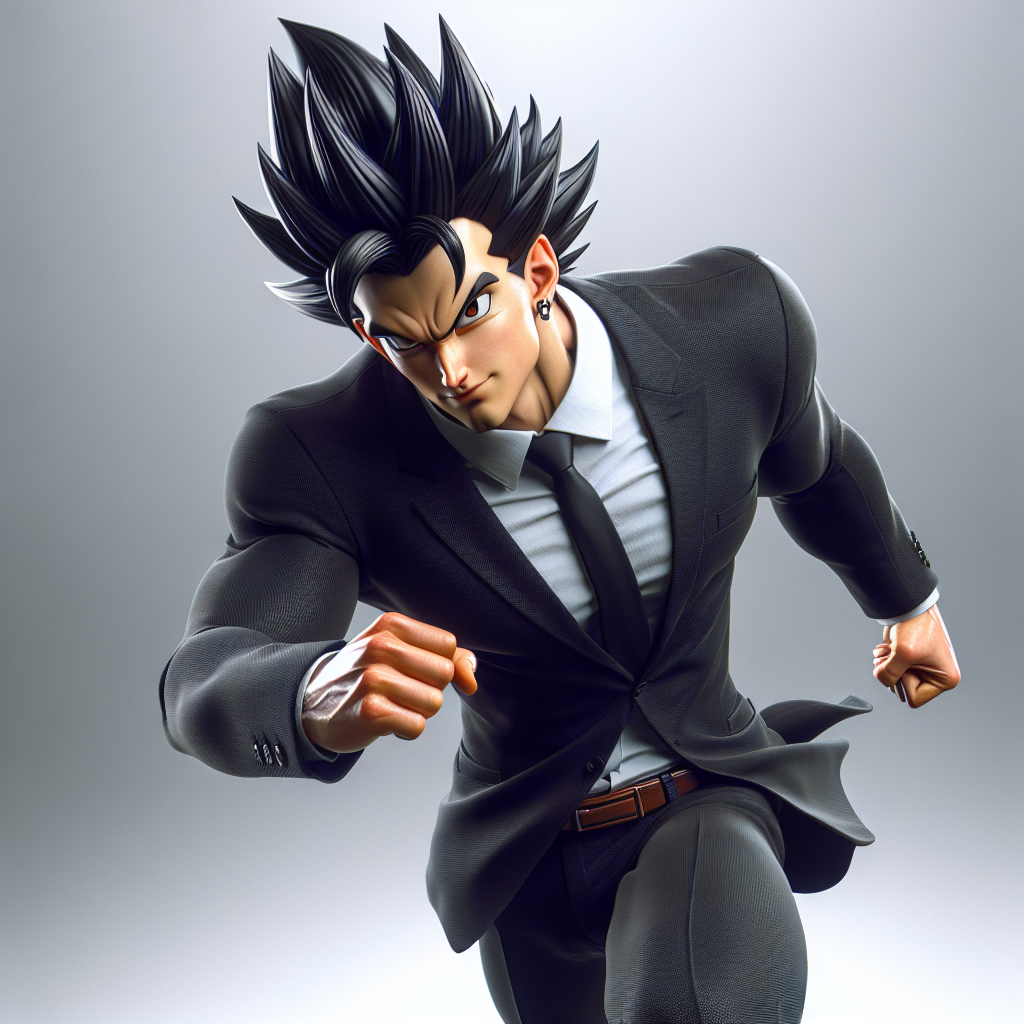

In [14]:
img

ベジータ？

In [17]:
import io

img = Image.open(requests.get(response.data[0].url, stream=True).raw)
# フォーマットがPNG、サイズが4MB以下、BytesIOオブジェクトじゃないといけない
img = img.resize((256, 256))
output = io.BytesIO()
img.save(output, format='PNG')
byte_array = output.getvalue()

response = client.images.create_variation(
  image=byte_array,
  n=1,
  size="1024x1024"
)
img2 = Image.open(requests.get(response.data[0].url, stream=True).raw)

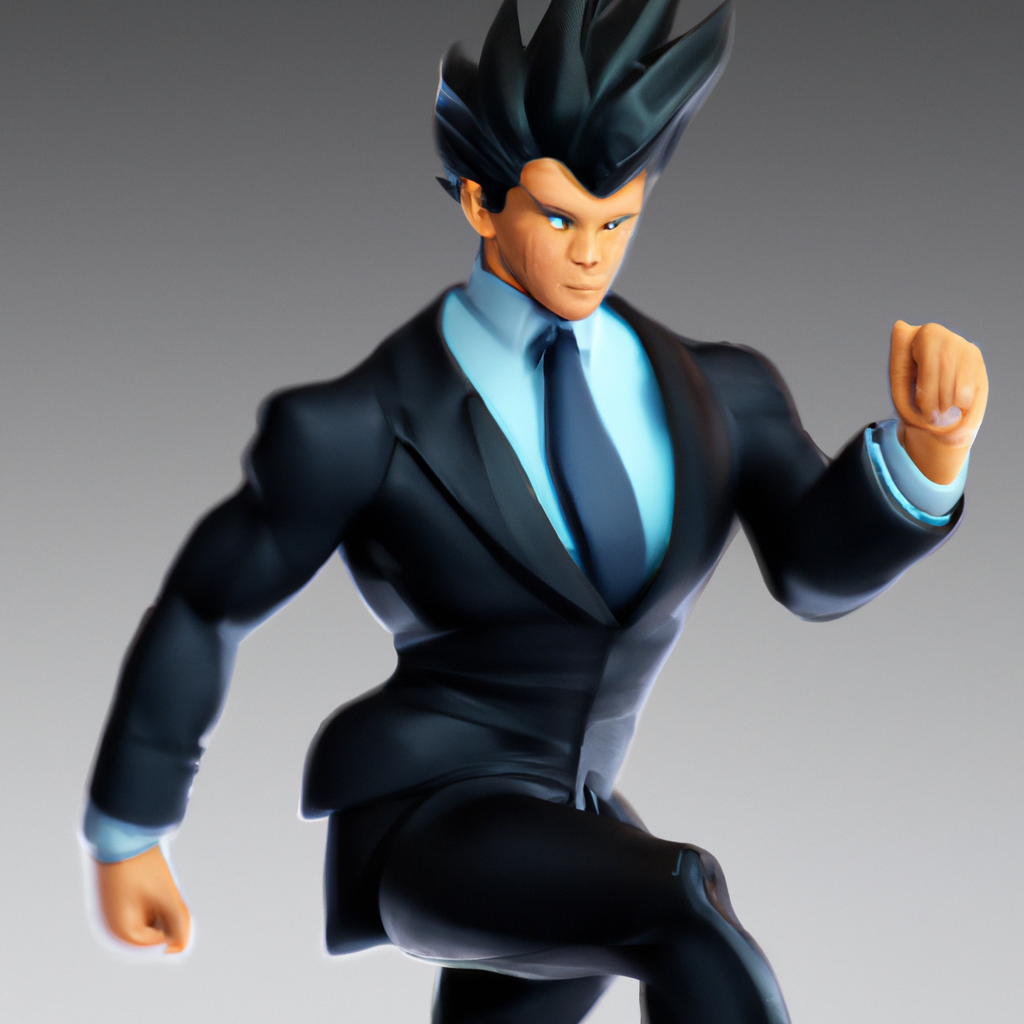

In [18]:
img2

よく読むとバリエーション作れるのは DALLE-2だけっぽいので、品質が下がったのはそのせいと思われる。
https://platform.openai.com/docs/guides/images/variations-dall-e-2-only

## GPT-4V の画像認識API

* https://platform.openai.com/docs/guides/vision

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot 2023-11-06 at 10.01.10.png to Screenshot 2023-11-06 at 10.01.10.png


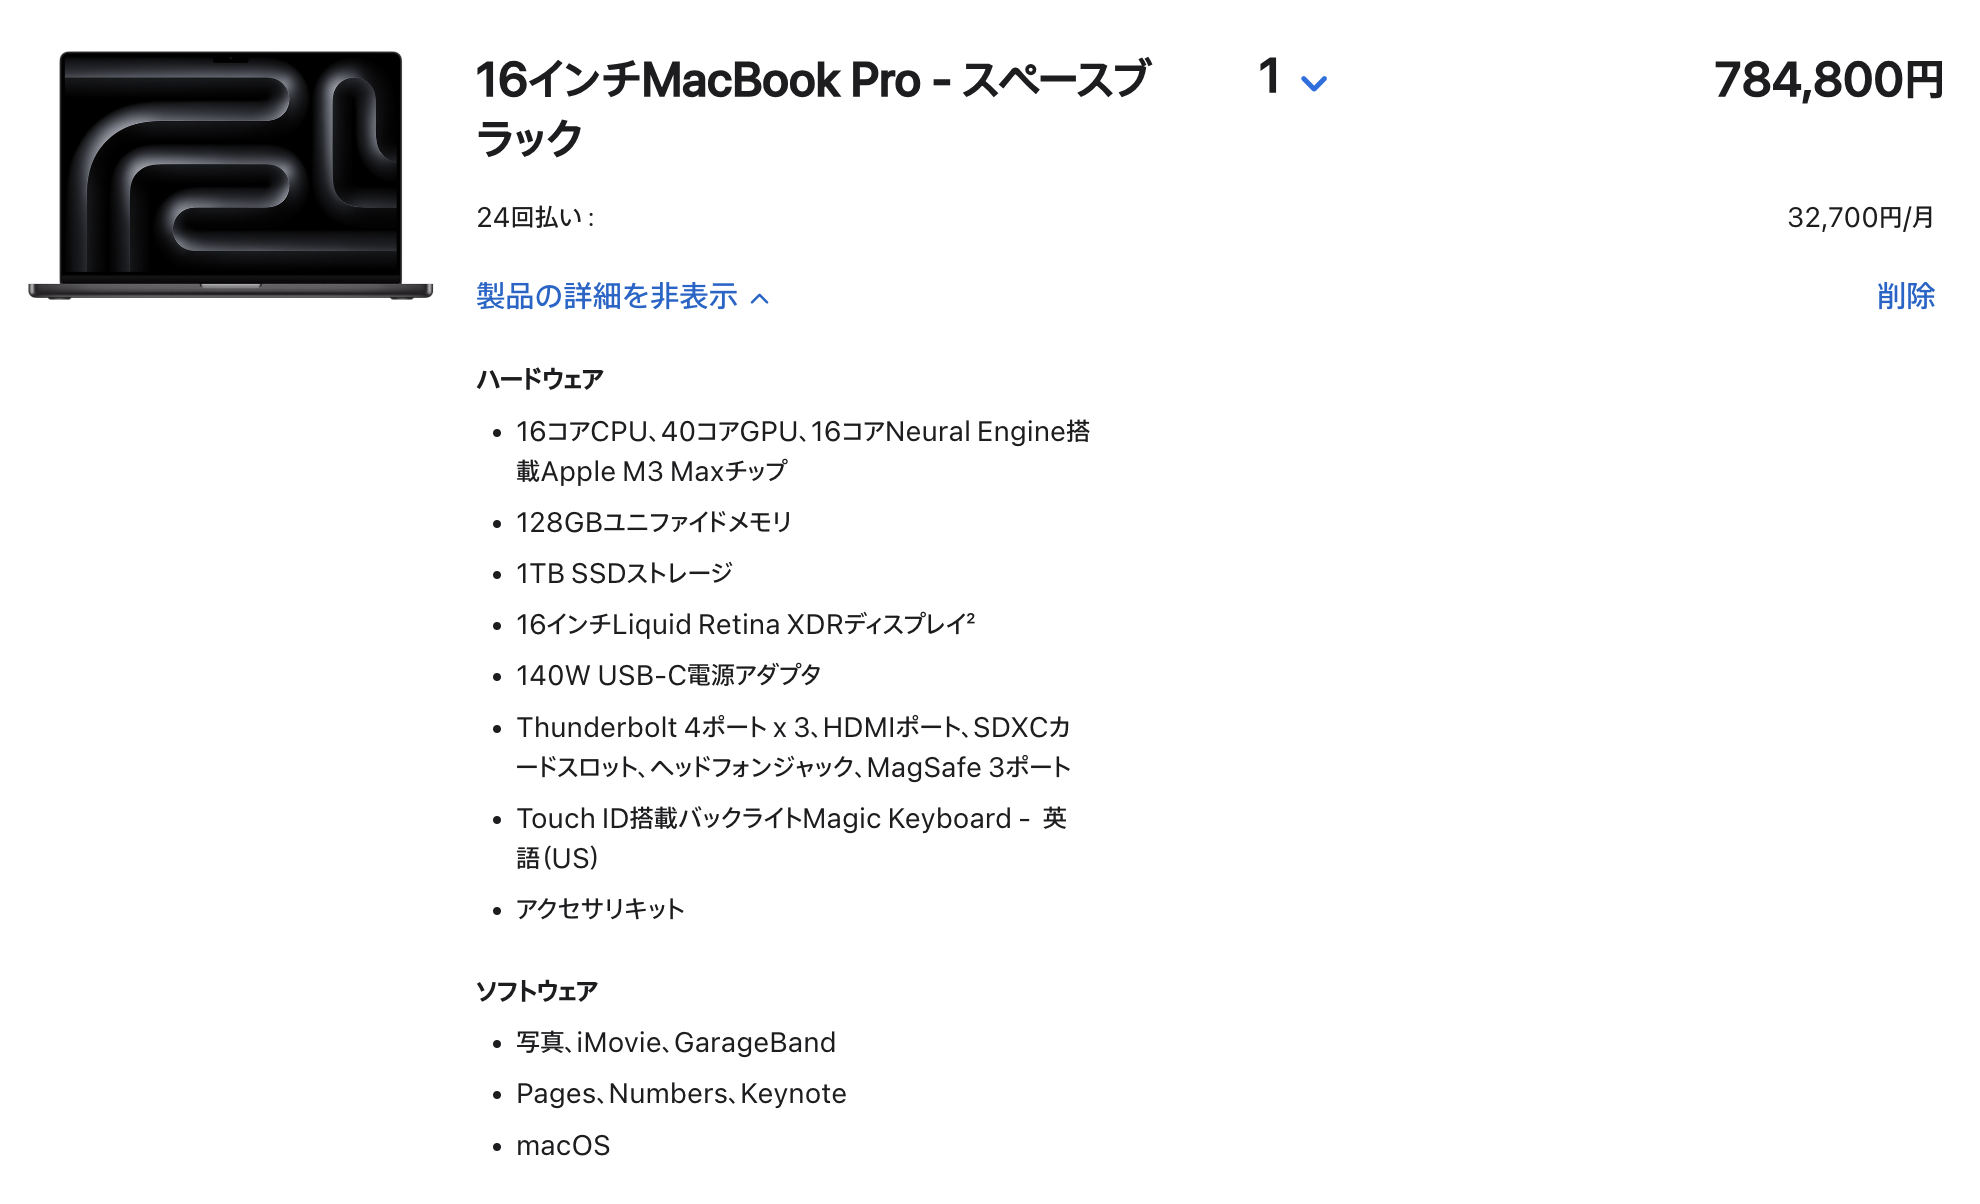

In [39]:
filename = list(uploaded.keys())
bytes_data = uploaded[filename[0]]
img = Image.open(io.BytesIO(bytes_data))
img

In [41]:
# 画像をbase64に変換
# 参考: https://platform.openai.com/docs/guides/vision/uploading-base-64-encoded-images

import base64

# def encode_image(image_path):
#     with open(image_path, "rb") as image_file:
#         return base64.b64encode(image_file.read()).decode('utf-8')

def encode_image(img):
    return base64.b64encode(img).decode('utf-8')

base64_image = encode_image(img)

TypeError: ignored

Image.openで変換する前のbytesオブジェクトが必要でした。

In [42]:
base64_image = encode_image(bytes_data)

In [43]:
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
}

payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {"type": "text", "text": "このパソコンが欲しいんですが、流石に高すぎますか？"},
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-8IRJ8YJJM1brJ57bA9j2wV4EqkpCx', 'object': 'chat.completion', 'created': 1699405566, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 1138, 'completion_tokens': 272, 'total_tokens': 1410}, 'choices': [{'message': {'role': 'assistant', 'content': 'この画像には、16インチMacBook Proのスペックと価格が表示されています。価格は784,800円となっており、確かに高額です。しかし、このモデルのスペックは非常に高性能であり、特にプロフェッショナルな用途や要求の高いソフトウェアを利用する方には適しているかもしれません。搭載されているApple M3 Maxチップ、128GBのメモリー、1TBのSSDストレージ、Liquid Retina XDRディスプレイなどの高性能なコンポーネントを見ると、その価格が正当化される理由がわかります。購入するかどうかは、ご自身の予算、用途、そして必要なパフォーマンスレベルによって異なります。高価ではあるものの、それ相応の価値があるかもしれません。'}, 'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'}, 'index': 0}]}


ありがとうございます。買います。

## TTS
* https://platform.openai.com/docs/guides/text-to-speech/text-to-speech

TBD

## Speech to Text
* https://platform.openai.com/docs/guides/speech-to-text/speech-to-text

TBD

## Assistants

* https://platform.openai.com/docs/assistants/overview/agents

TBD